# **Starter Code**



```
7(a). Download MNIST digit dataset (60,000 training and 10,000 testing data points) and the starter
code from the course page. Each row in the matrix represents a handwritten digit image. The
starter code shows how to visualize an example data point in Matlab. The task is to predict the
class (0 to 9) for a given test image, so it is a 10-way classification problem.
```



In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import operator 
from operator import itemgetter

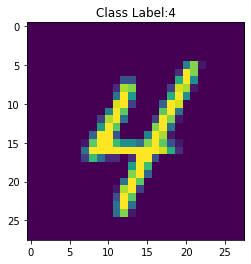

In [ ]:
#Loading the data
M = loadmat("/content/drive/MyDrive/ECS271 - Machine Learning & Discovery/Assignments/MNIST_digit_data (1).mat")
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

#just to make all random sequences on all computers the same.
np.random.seed(1)

#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

#if you want to use only the first 1000 data points.
# images_train = images_train[0:100,:]
# labels_train = labels_train[0:100,:]


#show the 10'th train image
i=10
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()


# **Function to find distance (Euclidean)**

In [ ]:
def find_dist(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

# **KNN class and methods**

In [ ]:
class KNN:
  #Initialize with k
  def __init__(self, k):
    self.k = k

  #Set X and Y train sets as class variables
  def fit(self, x_tr, y_tr):
    self.X_train = x_tr
    self.Y_train = y_tr

  #Main Predict function
  def predict(self, x_te):
    preds = []
    for i in range(len(x_te)):
      dist = np.array([find_dist(x_te[i], x_t) for x_t in self.X_train])
      dist_sorted = dist.argsort()[:self.k]
      proxim = {}
      for idx in dist_sorted:
        if tuple(self.Y_train[idx]) in proxim:
          proxim[tuple(self.Y_train[idx])] += 1
        else:
          proxim[tuple(self.Y_train[idx])] = 1
      
      sorted_neigh_count = sorted(proxim.items(), key=operator.itemgetter(1), reverse=True)
      preds.append(sorted_neigh_count[0][0])
  
    return np.array(preds)

  #Computes the average accuracy of the model
  def avg_accuracy(self, preds, y_te):
    return np.sum(preds == y_te) / len(y_te)

  #Computes the class-wise accuracy of the model
  def class_accuracy(self, preds, y_te):
    class_accs = []
    unique, counts = np.unique(y_te, return_counts=True)
    class_total = dict(zip(unique,counts))
    class_true = {}
    for i in range(len(preds)):
      if preds[i] == y_te[i]:
        if(preds[i][0] in class_true):
          class_true[preds[i][0]] += 1
        else:
          class_true[preds[i][0]] = 1

    for i in class_true.keys():
      class_accs.append(class_true[i] / class_total[i])
    return class_accs

  #Displays a correctly and wrongly predicted image
  def corr_wro(self, preds, x_te, y_te):
    for i in range(len(preds)):
      if preds[i] != y_te[i]:
        print("Incorrect Prediction: ")
        im = x_te[i,:].reshape((28,28),order='F')
        plt.imshow(im)
        plt.title('Predicted Class: {}\nClass Label: {}'.format(str(preds[i]), str(y_te[i])))
        plt.show()
        break

    for i in range(len(preds)):
      if preds[i] == y_te[i]:
        print("Correct Prediction: ")
        im = x_te[i,:].reshape((28,28),order='F')
        plt.imshow(im)
        plt.title('Predicted Class: {}\nClass Label: {}'.format(str(preds[i]), str(y_te[i])))
        plt.show()
        break



```
7(b). Write a Matlab or Python function that implements kNN for this task and reports the accuracy
for each class (10 numbers) as well as the average accuracy (one number).
[acc acc av] = kNN(images_train, labels_train, images_test, labels_test, k)
where acc is a vector of length 10 and acc av is a scalar. Look at a few correct and wrong
predictions to see if it makes sense. To speed it up, in all experiments, you may use only the first
1000 testing images.

```


In [ ]:
#KNN wrapper function -- outputs the average accuracy (scalar) along with the classwise accuracy (vector of length 10)
def kNN(images_train, labels_train, images_test, labels_test, K):
  model = KNN(k = K)
  model.fit(images_train, labels_train)
  predictions = model.predict(images_test)
  #model.corr_wro(predictions, images_test, labels_test)

  return model.avg_accuracy(predictions, labels_test), model.class_accuracy(predictions,labels_test)


Incorrect Prediction: 


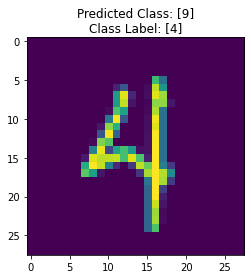

Correct Prediction: 


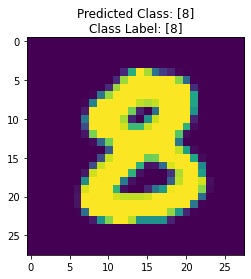

Avg Accuracy: 0.846

Classwise Accuracy: [0.7525773195876289, 0.8627450980392157, 0.6808510638297872, 0.970873786407767, 0.7816091954022989, 1.0, 0.8793103448275862, 0.8260869565217391, 0.7777777777777778, 0.9069767441860465]


In [ ]:
#Running KNN with k=3
a, b = kNN(images_train[0:500,:], labels_train[0:500,:], images_test[0:1000,:], labels_test[0:1000,:],3)
print("Avg Accuracy: {}\n".format(a))
print("Classwise Accuracy: {}".format(b))



```
7(c). For k = 1, change the number of training data points (30 to 10,000) to see the change in performance. Plot the average accuracy for 10 different dataset sizes. You may use command logspace
in Matlab. In the plot, x-axis is for the number of training data and y-axis is for the accuracy.
```



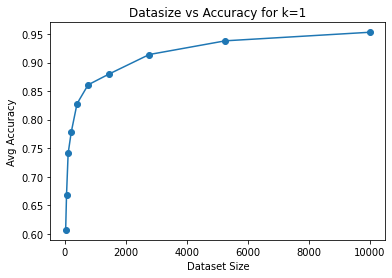

In [ ]:
#Initialize the X and Y variables -- denoting the x-axis and y-axis respectively
X = []
Y = []

#Iterating over the logspace between 30-10000 (10 nums)
for i in (np.logspace(1.49, 4, num=10, dtype=int)):
  avg_acc, _ = kNN(images_train[0:i,:], labels_train[0:i,:], images_test[0:1000,:], labels_test[0:1000,:], K=1)
  X.append(i)
  Y.append(avg_acc)

plt.plot(X, Y, marker = 'o')
plt.title('Datasize vs Accuracy for k=1')
plt.xlabel('Dataset Size')
plt.ylabel('Avg Accuracy')
plt.show()



```
7(d). Show the effect of k on the accuracy. Make a plot similar to the above one with multiple colored
curves on the top of each other (each for a particular k in [1 2 3 5 10].) You may use command
legend in Matlab to name different colors.
```



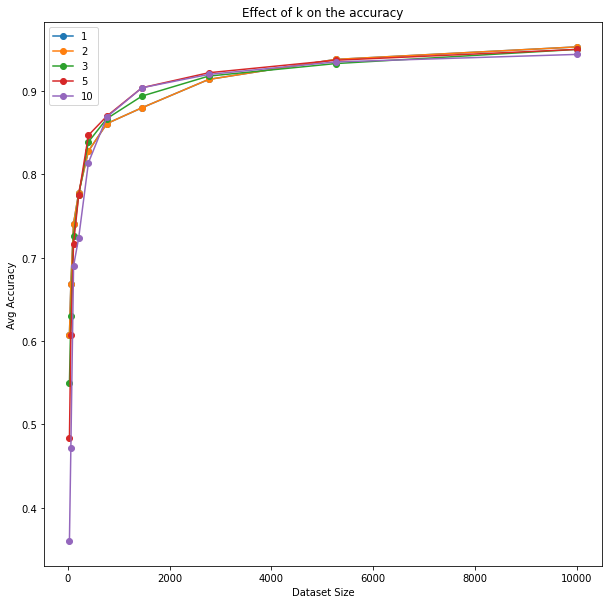

In [ ]:
#Initialzing the X, acc_dict[i] and k variables -- denoting the x-axis, y-axis and K values respectively
X = []
acc_dict = {1:[], 2:[], 3:[], 5:[], 10:[]}
K = [1,2,3,5,10]

for i in (np.logspace(1.49, 4, num=10, dtype=int)):
  X.append(i)

for k in K:
  acc_list = []
  for i in (np.logspace(1.49, 4, num=10, dtype=int)):
    avg_acc, _ = kNN(images_train[0:i,:], labels_train[0:i,:], images_test[0:1000,:], labels_test[0:1000,:], K=k)
    acc_list.append(avg_acc)
  acc_dict[k] = acc_list

plt.figure(figsize=(10, 10))
plt.title("Effect of k on the accuracy")
plt.xlabel("Dataset Size")
plt.ylabel("Avg Accuracy")
for i in K:
  plt.plot(X, acc_dict[i], marker = 'o', label=i)
  plt.legend(loc="upper left")
  

plt.show()



```
7(e). Choose the best k. First choose 2,000 training data randomly (to speed up the experiment).
Then, split the training data randomly to two halves (the first for training and the second for
cross-validation to choose the best k). Please plot the average accuracy wrt k on the validation
set. You may search for k in this list: [1 2 3 5 10]. Finally, report the accuracy for the best k on
the testing data.
```



In [ ]:
#Choosing 2,000 training data randomly
idxs = np.random.permutation(60000)[:2000]
images_train = images_train[idxs]
labels_train = labels_train[idxs]

#Splitting the data into two halves -- Training and Validation
x_train = images_train[0:1000,:]
y_train = labels_train[0:1000,:]
x_valid = images_train[1000:,:]
y_valid = labels_train[1000:,:]

Value of K for which accuracy is the highest on the Validation set:  3  with an accuracy of:  0.882


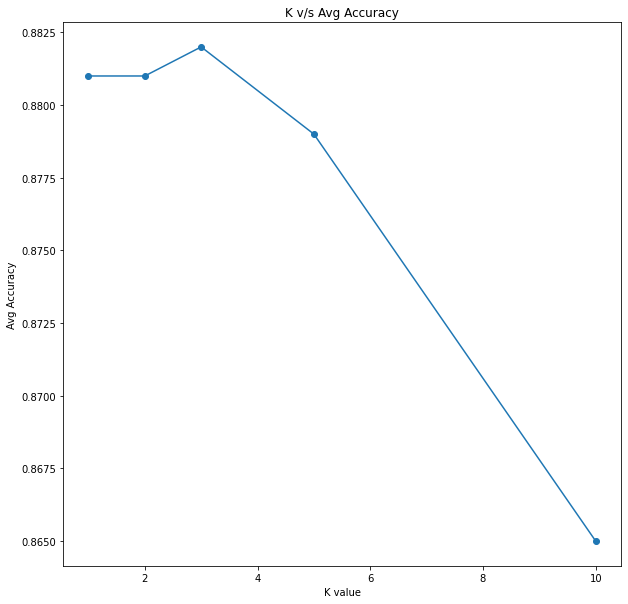


Accuracy of the model on the testing data with K value as 3 is 0.914


In [ ]:
#Initializing K, acc and best_k variables -- denotes x-axis, y-axis and the best K value
K = [1,2,3,5,10]
acc = []
best_k = {1:[], 2:[], 3:[], 5:[], 10:[]}

for k in K:
  best_k[k],_ = kNN(x_train, y_train, x_valid, y_valid, K=k)

best_k_sorted = sorted(best_k.items(), key=operator.itemgetter(1), reverse=True)
print("Value of K for which accuracy is the highest on the Validation set: ", best_k_sorted[0][0], " with an accuracy of: ", best_k_sorted[0][1])

plt.figure(figsize=(10, 10))
plt.title("K v/s Avg Accuracy")
plt.xlabel("K value")
plt.ylabel("Avg Accuracy")

for i in K:
  acc.append(best_k[i])

plt.plot(K, acc, marker = 'o')  

plt.show()

#Running KNN with the best k-value 
best_perf,_ = kNN(np.vstack((x_train, x_valid)), np.vstack((y_train, y_valid)), images_test[0:1000,:], labels_test[0:1000,:], K=best_k_sorted[0][0])
print("\nAccuracy of the model on the testing data with K value as {} is {}".format(best_k_sorted[0][0], best_perf))

# References

- https://medium.com/analytics-vidhya/a-beginners-guide-to-knn-and-mnist-handwritten-digits-recognition-using-knn-from-scratch-df6fb982748a